# W02_2 資料視覺化2

----
## 應用練習: 高雄市空氣品質監測數據

- https://data.gov.tw/dataset/104783

- 資料資源欄位: 
    - Name(測站名稱)、Date(監測日期)、TSP(總懸浮微粒μg/m3)、PM10(懸浮微粒μg/m3)、Chloride(氯鹽μg/m3)、Nitrate(硝酸鹽μg/m3)、Sulfate(硫酸鹽μg/m3)、Lead(鉛μg/m3)、Dust(落塵量-公噸/平方公里/月)

- 檔案格式: CSV

- 編碼格式: UTF-8

In [18]:
import requests

In [19]:
url = 'https://data.kcg.gov.tw/dataset/e9aa2660-c4eb-46e1-a4fd-758f59c70e67/resource/ed5eacda-ee80-44b4-aa9a-88bbaf054512/download/2018humanstation.csv'

- 請試著寫程式把此 csv 資料取回來

In [20]:
# 請填入程式
r = requests.get(url)
r

<Response [200]>

In [22]:
import csv

cr = csv.reader(decoded_content.splitlines(), delimiter=',')
data_list = list(cr)
len(data_list)

NameError: name 'decoded_content' is not defined

In [13]:
print(data_list[:5])

NameError: name 'data_list' is not defined

- 如果你不方便抓資料，或是資料連結已經遺失，可以直接讀檔案

In [ ]:
# import csv

# file = open('2018_kh_data.csv')
# cr = csv.reader(file)
# data_list = list(cr)

In [23]:
# 更好的寫法!
with open('2018_kh_data.csv', 'r') as f:
    cr = csv.reader(f)
    data_list = list(cr)
data_list[0:5]

[['Name',
  'Date',
  'TSP',
  'PM10',
  'Chloride',
  'Nitrate',
  'Sulfate',
  'Lead',
  'Dust'],
 ['大社工業區', '2018年1月', '93', '', '', '', '', '0.029', '3.6'],
 ['大寮區公所', '2018年1月', '79', '', '', '', '', '0.042', '1.54'],
 ['大樹監測站', '2018年1月', '61', '', '', '', '', '0.02', '1.18'],
 ['仁武國中', '2018年1月', '79', '', '', '', '', '0.058', '2.68']]

----
## 讓我們開始來繪圖吧!

In [24]:
data_list[:3]

[['Name',
  'Date',
  'TSP',
  'PM10',
  'Chloride',
  'Nitrate',
  'Sulfate',
  'Lead',
  'Dust'],
 ['大社工業區', '2018年1月', '93', '', '', '', '', '0.029', '3.6'],
 ['大寮區公所', '2018年1月', '79', '', '', '', '', '0.042', '1.54']]

### 把資料依各月份整理出來

- 資料資源欄位: 
    - Name(測站名稱)
    - Date(監測日期)
    - TSP(總懸浮微粒μg/m3)
    - PM10(懸浮微粒μg/m3)
    - Chloride(氯鹽μg/m3)
    - Nitrate(硝酸鹽μg/m3)
    - Sulfate(硫酸鹽μg/m3)
    - Lead(鉛μg/m3)
    - Dust(落塵量-公噸/平方公里/月)

- 先試著整理大社工業區的資料

In [25]:
data_list[1][0], data_list[1][2]

('大社工業區', '93')

In [30]:
tsp_list = []
for item in data_list[1:]:
    name = item[0]
    date = item[1]
    tsp = item[2]
    if name == '大社工業區':
        tsp_list.append(int(tsp))


In [27]:
len(tsp_list), tsp_list

(12, [93, 102, 108, 79, 55, 58, 67, 26, 68, 101, 103, 147])

In [22]:
%matplotlib inline

Text(0, 0.5, 'Dust')

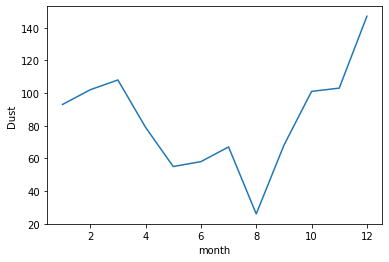

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(1, 13), tsp_list)
plt.xlabel('month')
plt.ylabel('Dust')


- 如果你需要格線

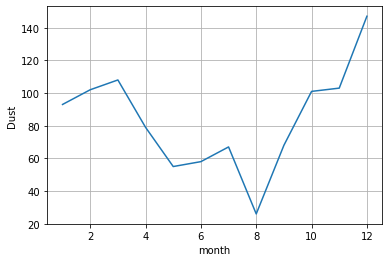

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(1, 13), tsp_list)
plt.xlabel('month')
plt.ylabel('Dust')
plt.grid()

### 換個顯示方式! 哇!!怎…麼…

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 20221 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32317 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25080 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\ma

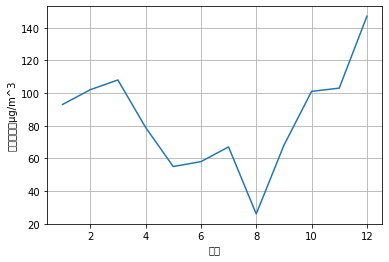

In [28]:
import matplotlib.pyplot as plt
plt.plot(range(1, 13), tsp_list)
plt.xlabel('月份')
plt.ylabel('總懸浮微粒μg/m^3')
plt.grid()

### 處理中文字的問題

- ref: https://free.com.tw/google-noto-fonts/
- google提供的免費字型: https://fonts.google.com/
    * ref. from: [this](https://github.com/victorgau/python_investment/blob/master/3-1%20%E6%8A%93%E5%8F%96%E8%B2%A1%E5%8B%99%E5%A0%B1%E8%A1%A8.ipynb?fbclid=IwAR0D4vHlYGiPB02uu00-8x6A_HgqZO6V7u9XFhsSbS7EG0eGr9qATHoAcu4)

In [ ]:
#使用colab引入字型檔前，需要先使用這行來上傳檔案
# from google.colab import files
# uploaded = files.upload()

In [30]:
range(1,13)

range(1, 13)

In [31]:
list(range(1,13))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

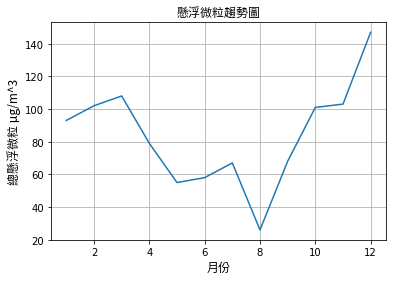

In [28]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"NotoSansTC-Regular.otf", size=12)  #size:字體大小

months = list(range(1, 13))
plt.plot(months, tsp_list)
plt.title('懸浮微粒趨勢圖', fontproperties = font)
plt.xlabel('月份', fontproperties = font)
plt.ylabel('總懸浮微粒 μg/m^3', fontproperties = font)
plt.grid()

- 再整理一站出來，並把圖畫在一起

In [29]:
tsp_list2 = []
for item in data_list[1:]:
    name = item[0]
    date = item[1]
    tsp = item[2]
    if name == '西子灣中山大學':
        tsp_list2.append(int(tsp))
tsp_list2

[84, 48, 55, 51, 22, 35, 41, 28, 24, 103, 77, 87]

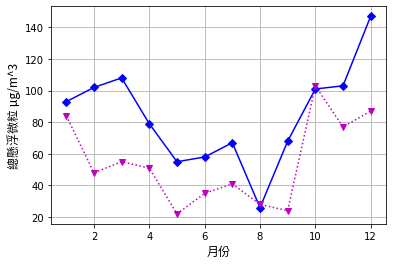

In [31]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"NotoSansTC-Regular.otf", size=12)

months = list(range(1, 13))
plt.plot(months, tsp_list, 'b-D')
plt.plot(months, tsp_list2, 'm:v')
plt.xlabel('月份', fontproperties = font)
plt.ylabel('總懸浮微粒 μg/m^3', fontproperties = font)
plt.grid()

- 進一步把圖例說明也加上去

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 31038 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24037 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-package

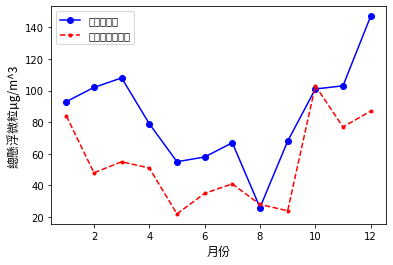

In [32]:
plt.plot(months, tsp_list, 'b-o', label='大社工業區')
plt.plot(months, tsp_list2, 'r--.', label='西子灣中山大學')
plt.xlabel('月份', fontproperties = font)
plt.ylabel('總懸浮微粒μg/m^3', fontproperties = font)
plt.legend()

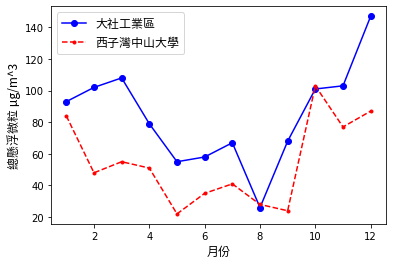

In [84]:
plt.plot(months, tsp_list, 'b-o', label=u'大社工業區')
plt.plot(months, tsp_list2, 'r--.', label=u'西子灣中山大學')
plt.xlabel('月份', fontproperties = font)
plt.ylabel('總懸浮微粒 μg/m^3', fontproperties = font)
plt.legend(prop=font)


### 整理全部的資料，並畫出來

### 練習題：請畫出多筆資料的趨勢圖
- plt.subplots(figsize=(12,8)): 可以把圖變大
- fig, ax1 = plt.subplots(figsize=(12,8), dpi=120)
- plt.legend(prop=font, bbox_to_anchor=(1.0, 1.0)) 可以強制指定圖例的位置
- 如果沒有資料時，建議填入 None

In [36]:
# 先整理資料
month_list = {}
for i in range(12):
    month_list['2018年%d月' %(i+1)] = i+1
    
month_list

{'2018年1月': 1,
 '2018年2月': 2,
 '2018年3月': 3,
 '2018年4月': 4,
 '2018年5月': 5,
 '2018年6月': 6,
 '2018年7月': 7,
 '2018年8月': 8,
 '2018年9月': 9,
 '2018年10月': 10,
 '2018年11月': 11,
 '2018年12月': 12}

In [37]:
tsp_data = {}
for item in data_list[1:]:
    name = item[0]
    tsp_data[name] = [None]*12
tsp_data

{'大社工業區': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 '大寮區公所': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 '大樹監測站': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 '仁武國中': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 '半屏山電信局': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 '左營國小': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 '永安工業區': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 '西子灣中山大學': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 '岡山醫院': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 '林園工業區': [None,
  None,
  None,
  None,
  Non

In [39]:
for item in data_list[1:]:
    try:
        name = item[0]
        date = item[1]
        tsp = item[2]
        tsp_data[name][month_list[date]-1] = int(tsp)
    except Exception as e:
        print(name, date, tsp, str(e))
        print(e.args) 

In [117]:
# 查看資料
tsp_data

{'大社工業區': [93, 102, 108, 79, 55, 58, 67, 26, 68, 101, 103, 147],
 '大寮區公所': [79, 91, 92, 75, 43, 41, 44, 14, 31, 79, 98, 124],
 '大樹監測站': [61, 65, 79, 63, 37, 37, None, None, None, None, None, None],
 '仁武國中': [79, 86, 108, 78, 44, 48, 56, 19, 46, 91, 115, 134],
 '半屏山電信局': [104, 62, 69, 72, 40, 37, 32, 30, 26, 130, 104, 119],
 '左營國小': [98, 59, 54, 61, 49, 22, 37, 22, 32, 89, 65, 90],
 '永安工業區': [83, 83, 101, 84, 52, 45, 56, 23, 46, 101, 93, 111],
 '西子灣中山大學': [84, 48, 55, 51, 22, 35, 41, 28, 24, 103, 77, 87],
 '岡山醫院': [102, 84, 120, 82, 39, 20, 17, 32, 64, 104, 106, 121],
 '林園工業區': [90, 94, 94, 78, 36, 48, 51, 25, 53, 86, 98, 143],
 '河濱國小': [55, 67, 56, 59, 34, 29, 42, 22, 27, 100, 84, 97],
 '阿蓮區公所': [65, 69, 80, 63, 35, 33, 46, 18, 31, 74, 80, 102],
 '前鎮國小': [109, 86, 98, 82, 49, 79, 78, 43, 70, 110, 112, 111],
 '莊敬國小': [87, 53, 53, 67, 35, 33, 29, 21, 22, 98, 77, 110],
 '愛國國小': [97, 70, 74, 78, 35, 39, 38, 24, 31, 100, 110, 100],
 '楠梓區清潔隊': [84, 93, 106, 74, 40, 43, 52, 21, 43, 100, 103, 

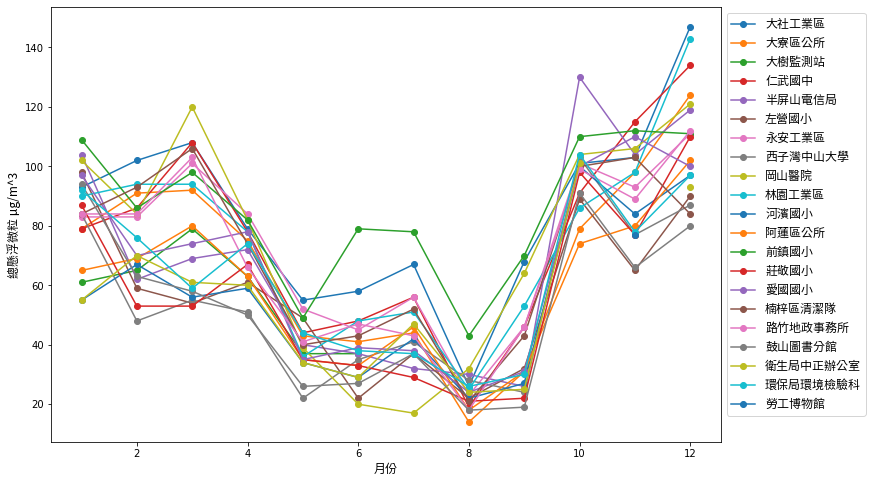

In [118]:
# 請填入程式
plt.subplots(figsize=(12,8))
for key in tsp_data:
    plt.plot(months, tsp_data[key], '-o', label=key)
plt.xlabel('月份', fontproperties = font)
plt.ylabel('總懸浮微粒 μg/m^3', fontproperties = font)
plt.legend(prop=font, bbox_to_anchor=(1.0, 1.0))  #bbox_to_anchor:將label掛在外面

### 為何前面要使用 None 來填充沒資料的欄位

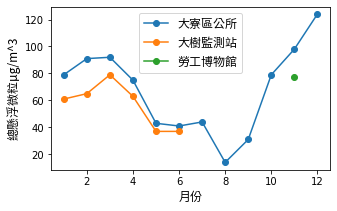

In [40]:
fig, ax1 = plt.subplots(figsize=(5,3))

plt.plot(months, tsp_data['大寮區公所'], '-o', label='大寮區公所')
plt.plot(months, tsp_data['大樹監測站'], '-o', label='大樹監測站')
plt.plot(months, tsp_data['勞工博物館'], '-o', label='勞工博物館')


plt.xlabel('月份', fontproperties = font)
plt.ylabel('總懸浮微粒μg/m^3', fontproperties = font)
#plt.legend(prop=font, bbox_to_anchor=(1.0, 1.0))
plt.legend(prop=font)
